In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pdb;
import time
import copy
from numpy import cos,sin,pi

from my_lib import *

%load_ext autoreload

%autoreload 2

In [2]:
actuation_noise_std = np.ones((2,))*0.05*60

measurement_noise_std = np.array([0.003,0.003,4.98e-5,1.25e-5]) #np.ones((4,))*1e-5

measure_noise_cov = np.diag(measurement_noise_std)
state_noise_cov = np.diag(measurement_noise_std)

/home/samer/Documents/Subjects/2019 Fall/ECE 2019 AS - Computational Robotics/ece_209as_lab3/my_lib.py:62: RuntimeWarning: divide by zero encountered in double_scalars
  get_dist_y = lambda x :  [(x - state[1])/ np.sin(state[2]), (x - state[1])/ np.sin(state[2]+pi/2)]


MSE [0.01107618 0.03551899 0.01207611]
MSE [0.0405328  0.15425757 0.0195205 ]


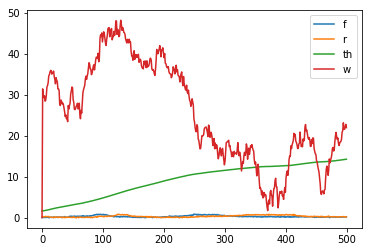

<Figure size 432x288 with 0 Axes>

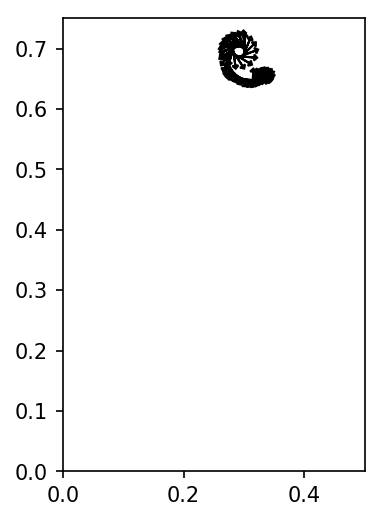

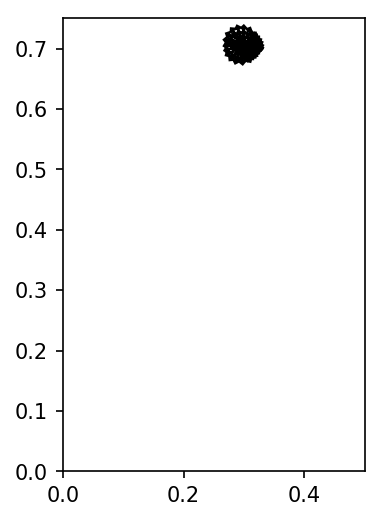

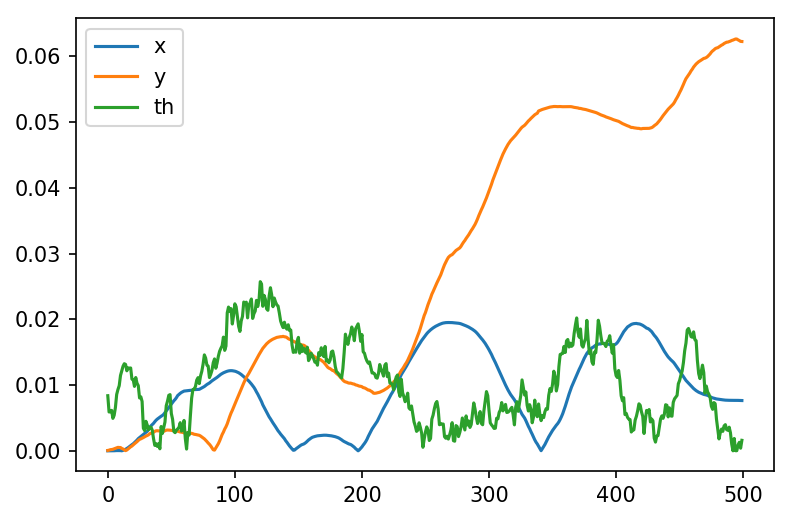

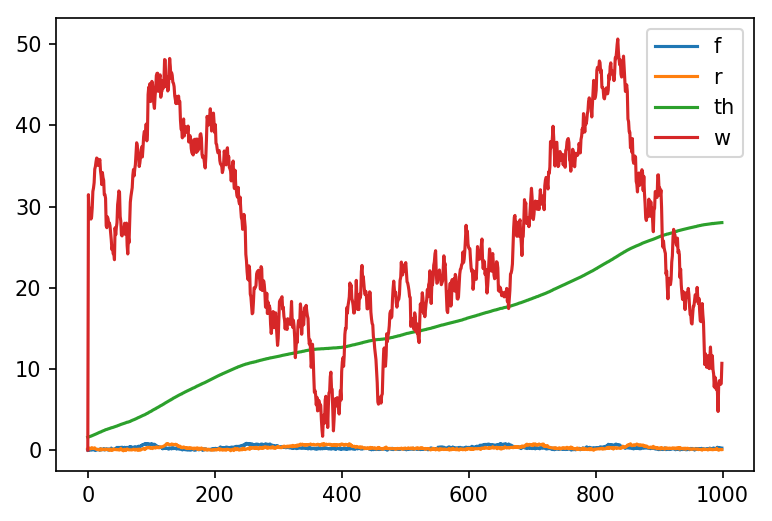

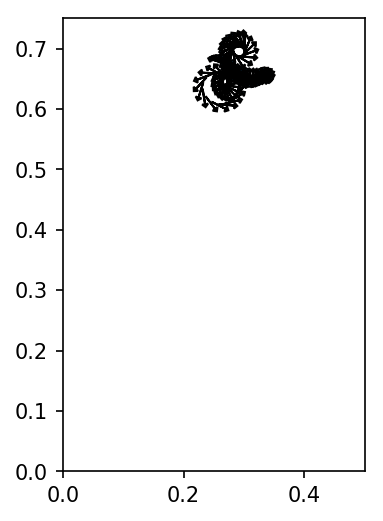

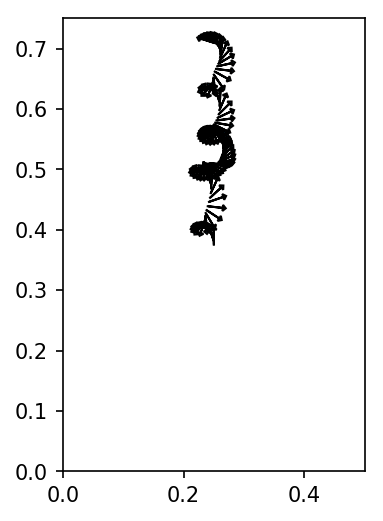

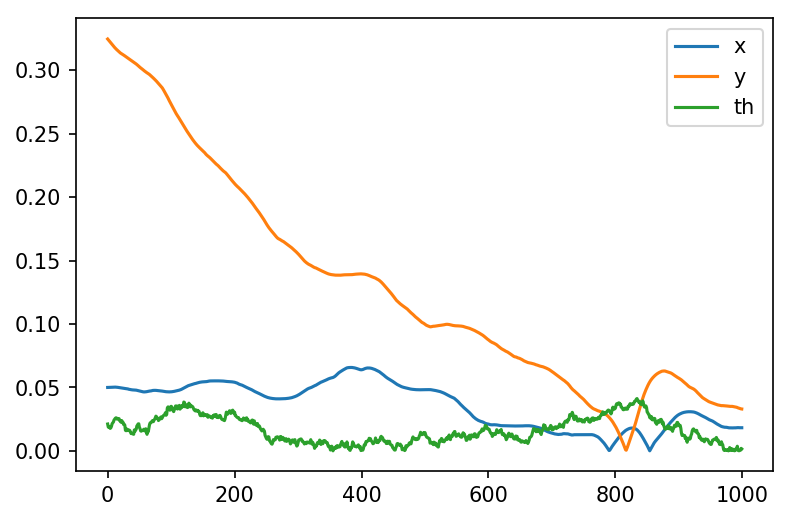

In [3]:
def calc_mse(state_seq,pred_states2):
    m_state_seq = np.array(state_seq)
    m_pred_states2 =np.array(pred_states2)
#     print(m_pred_states2[:,0:3].shape)
    mse = np.sqrt(np.mean( (m_pred_states2[:,0:3] - m_state_seq[:,0:3,])**2,axis = 0))
    return mse
    

def eval_one_traj(control_seq,init_state, seed =0, plot = True):
    np.random.seed(seed)
    state_seq,obs_seq = trace_traj(init_state,control_seq,actuation_noise_std,measurement_noise_std)
    


    init_cov = np.zeros((4,4))
    actuation_noise_cov = np.diag(actuation_noise_std)**2
    measure_noise_cov = np.diag(measurement_noise_std)**2


    pred_states2 = apply_kalman2(obs_seq,control_seq,init_state,init_cov,actuation_noise_cov,measure_noise_cov,spreading = 1)
    
    plt.plot(np.array(obs_seq))
    plt.legend(['f','r','th','w'])
    plt.figure()

    if plot:
        plot_state_seq(state_seq,10)
        plot_state_seq(pred_states2,10)
        eval_states2(pred_states2,state_seq)
        print("MSE" , calc_mse(state_seq,pred_states2))
    return (state_seq,pred_states2)


def eval_one_traj_unknown(control_seq,init_state, seed =0, plot = True):
    np.random.seed(seed)
    state_seq,obs_seq = trace_traj(init_state,control_seq,actuation_noise_std,measurement_noise_std)
    


    init_cov = np.diag(np.ones((4,)))
    actuation_noise_cov = np.diag(actuation_noise_std)**2
    measure_noise_cov = np.diag(measurement_noise_std)**2
    
    plt.figure()
    plt.plot(np.array(obs_seq))
    plt.legend(['f','r','th','w'])
    

    
    pred_states2 = apply_kalman2(obs_seq,control_seq,[W/2,L/2,0,0],init_cov,actuation_noise_cov,measure_noise_cov,spreading = 0.1)
   
    if plot:
        plot_state_seq(state_seq,10)
        plot_state_seq(pred_states2,10)
        eval_states2(pred_states2,state_seq)
        print("MSE" , calc_mse(state_seq,pred_states2))
    return (state_seq,pred_states2)


control_seq = [[-60,60]]*500
init_state = [0.30,0.7,0,0]
eval_one_traj(control_seq,init_state,seed = 1);
control_seq = [[-60,60]]*1000
eval_one_traj_unknown(control_seq,init_state, seed =1);

/home/samer/Documents/Subjects/2019 Fall/ECE 2019 AS - Computational Robotics/ece_209as_lab3/my_lib.py:62: RuntimeWarning: divide by zero encountered in double_scalars
  get_dist_y = lambda x :  [(x - state[1])/ np.sin(state[2]), (x - state[1])/ np.sin(state[2]+pi/2)]


MSE [0.01107618 0.03551899 0.01207611]
MSE [0.0405328  0.15425757 0.0195205 ]


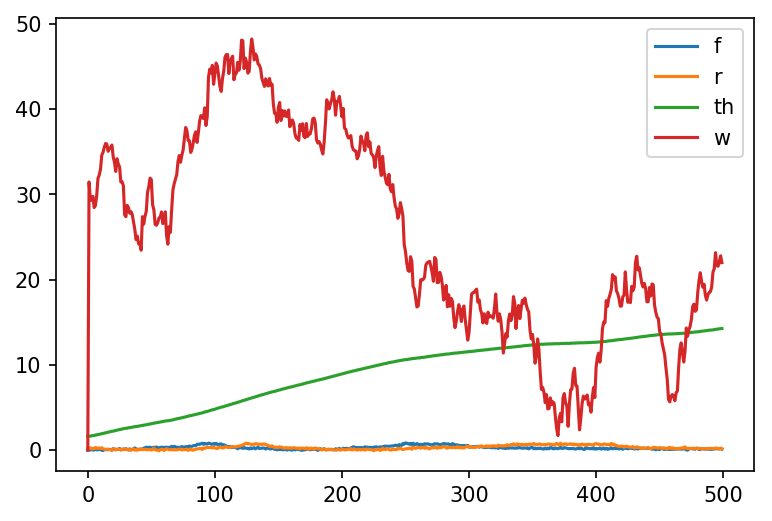

<Figure size 900x600 with 0 Axes>

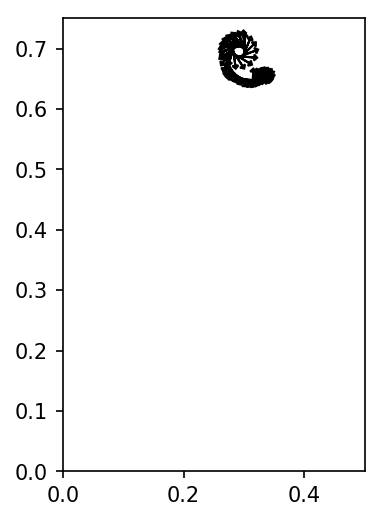

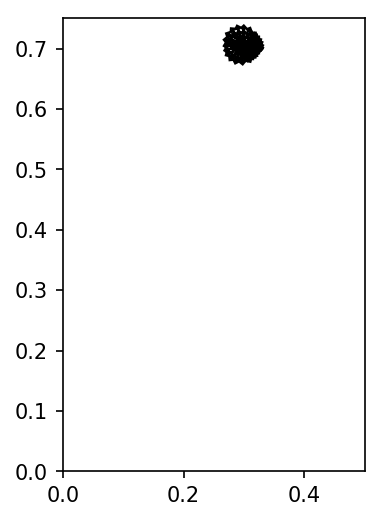

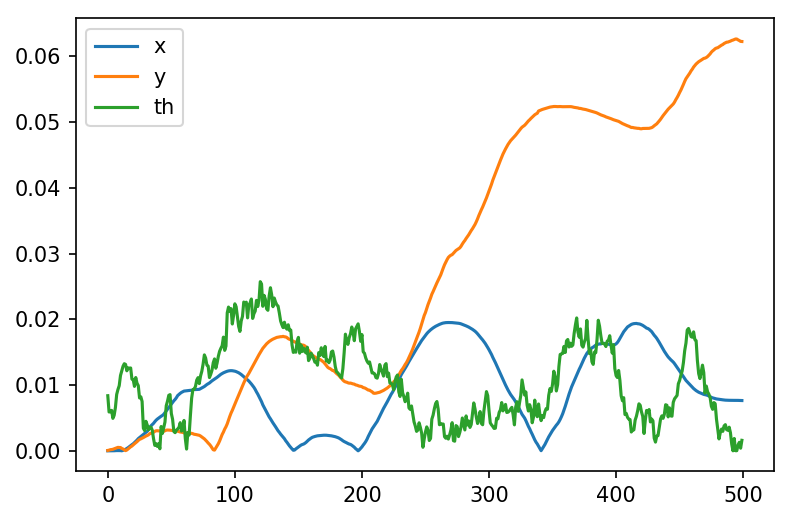

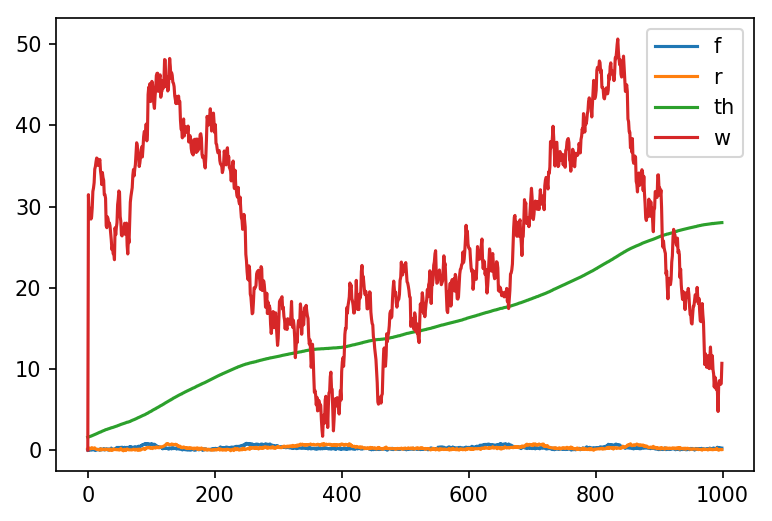

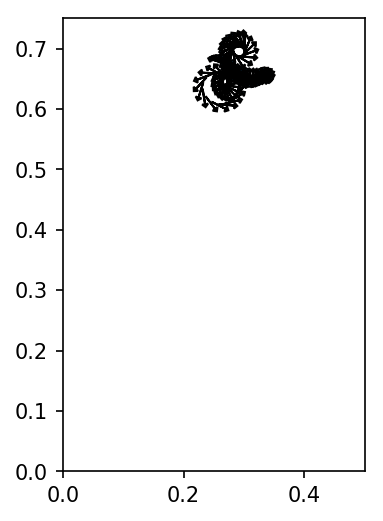

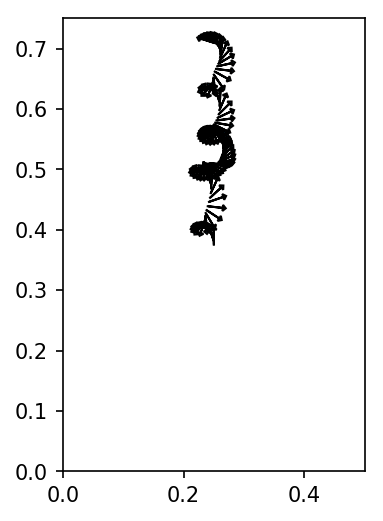

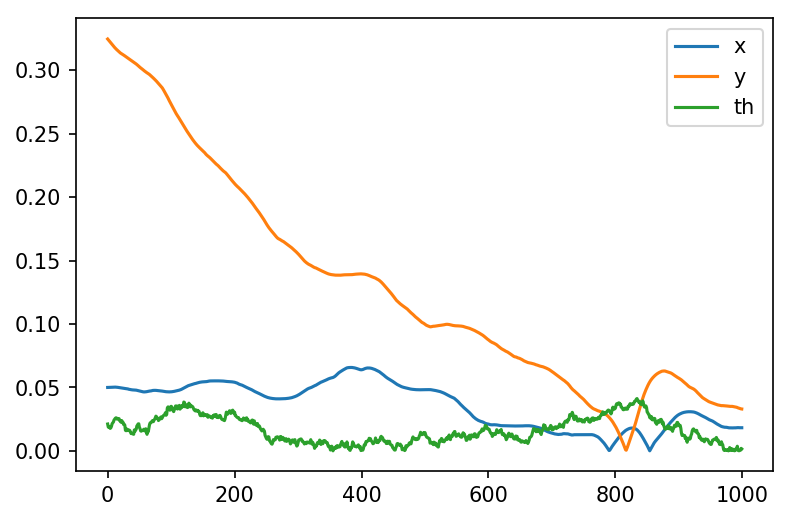

In [4]:
control_seq = [[-60,60]]*500
init_state = [0.30,0.7,0,0]
eval_one_traj(control_seq,init_state,seed = 1);
control_seq = [[-60,60]]*1000
eval_one_traj_unknown(control_seq,init_state, seed =1);

MSE [0.00570993 0.04484433 0.00802681]


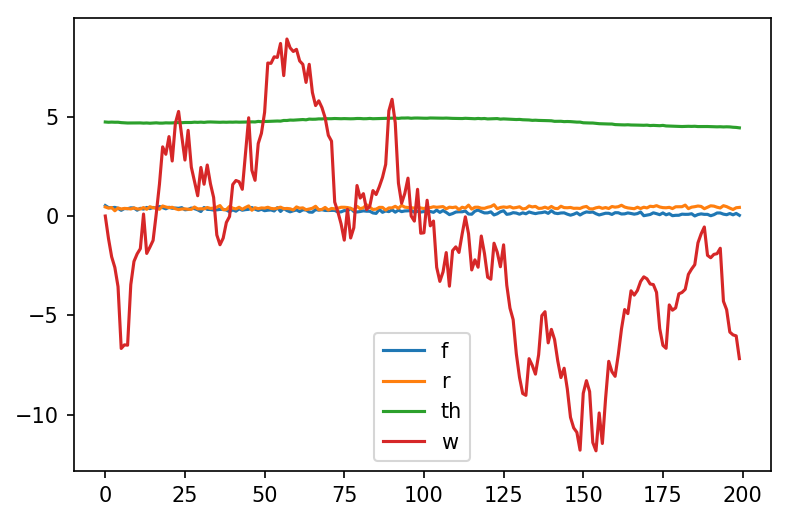

<Figure size 900x600 with 0 Axes>

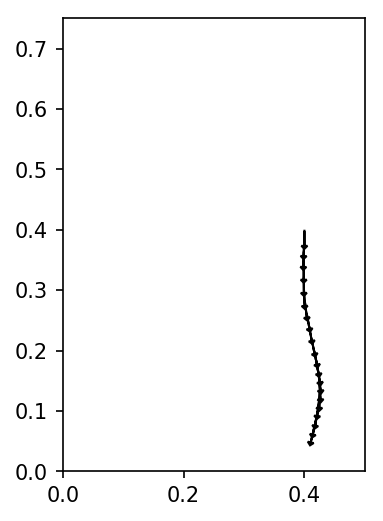

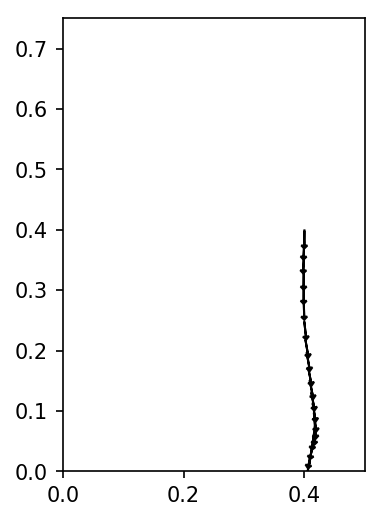

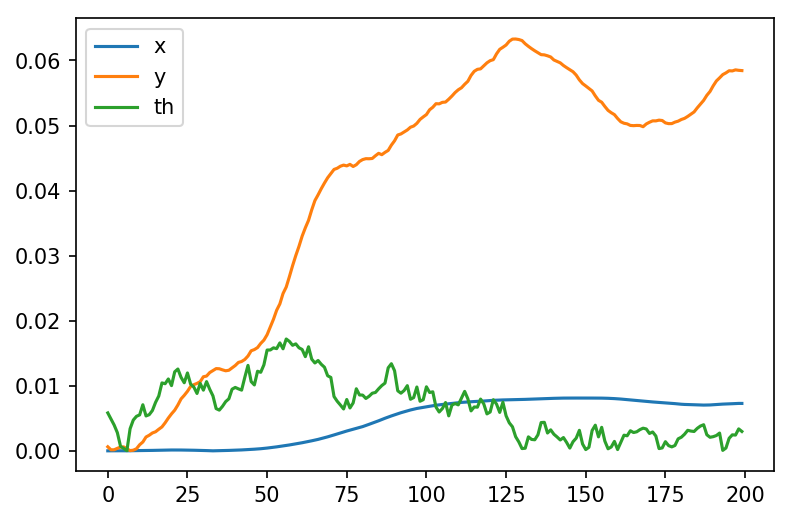

In [5]:
control_seq = [[60,60]]*200
init_state = [0.4,0.4,pi,0]
eval_one_traj(control_seq,init_state,seed = 0);

MSE [0.05984026 0.08709497 0.00802768]


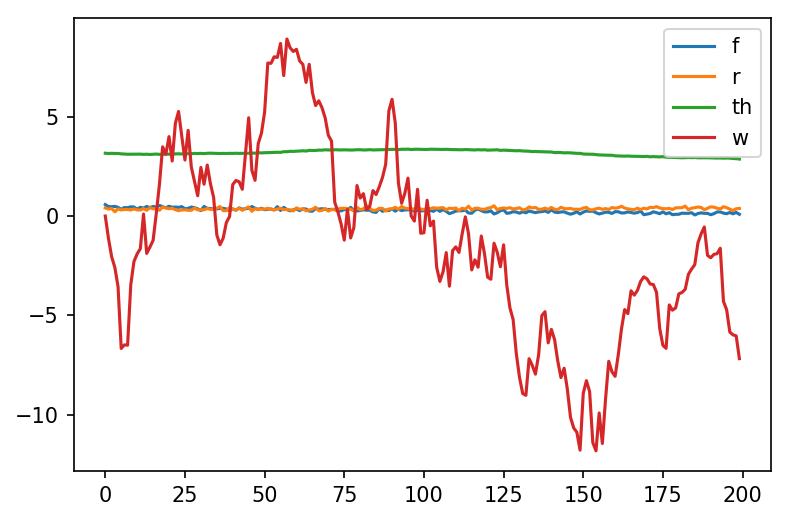

<Figure size 900x600 with 0 Axes>

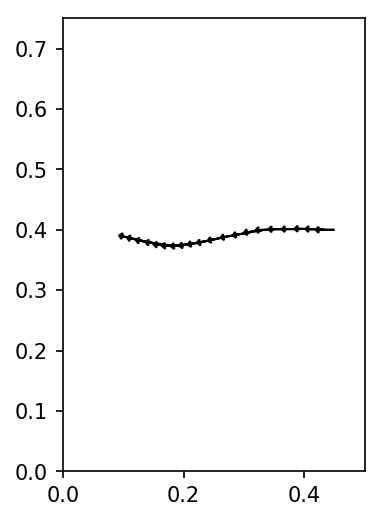

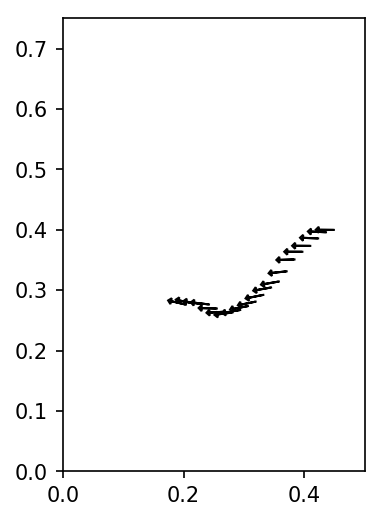

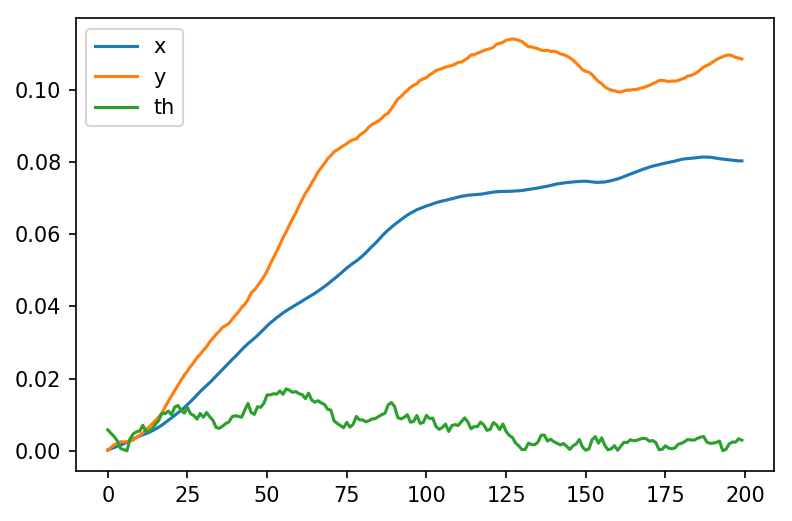

In [6]:
control_seq = [[60,60]]*200
init_state = [0.45,0.4,pi/2,0]
eval_one_traj(control_seq,init_state,seed = 0);

MSE [0.00518009 0.02177858 0.00706958]


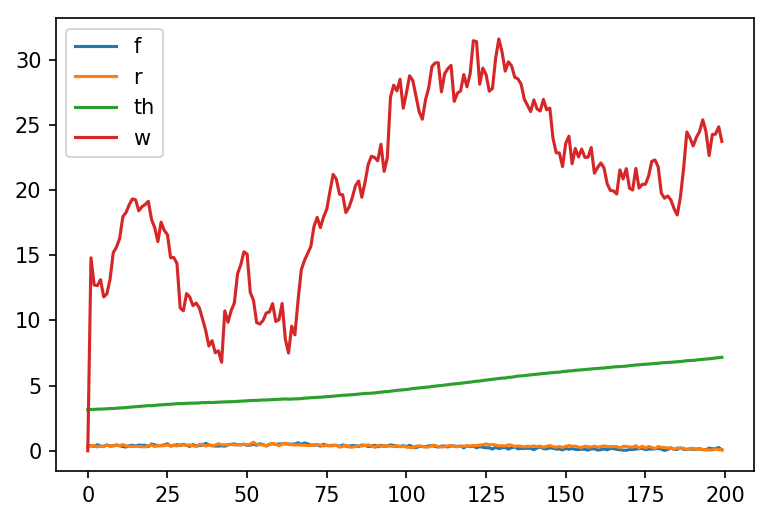

<Figure size 900x600 with 0 Axes>

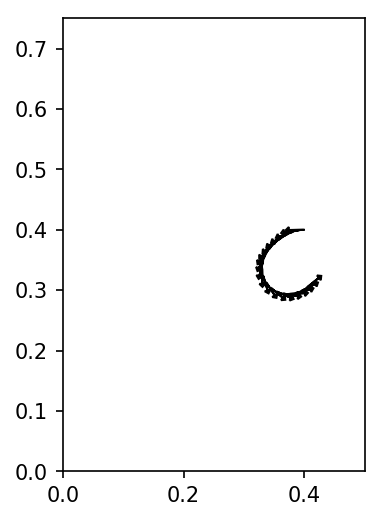

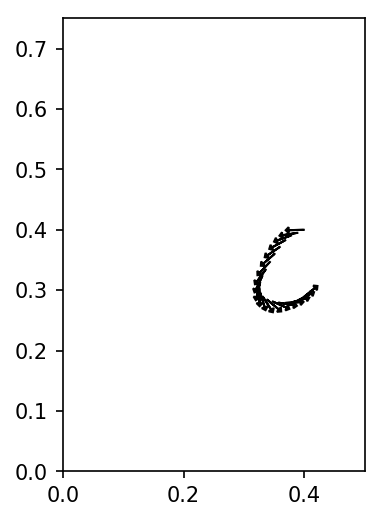

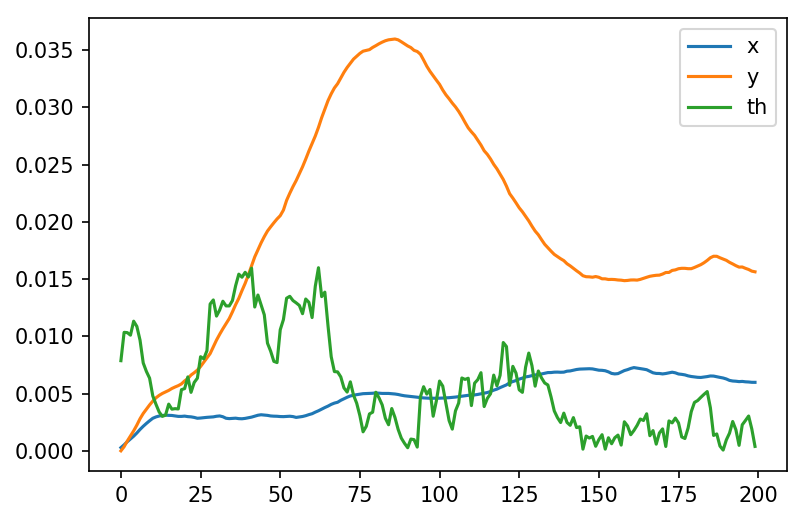

In [7]:
control_seq = [[0,60]]*200
init_state = [0.4,0.4,np.pi/2,0]
eval_one_traj(control_seq,init_state,seed = 1);

In [8]:
for _ in range(100):
    print()